## Title :
Gradient Clipping

## Description :
The aim of this exercise is to understand gradient clipping. 

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Generate predictor and response data using the function `f`.
- Visualise the generated data using the helper code. The graph will look similar to the one given above.
- Implement the `clip` function to return the gradient based on the `clip_threshold`. Consider the image shown below for implementation.
- Set `learning_rate` as mentioned in the scaffold.
- In the gradient descent algorithm incorporate gradient clipping. Follow the step by step instructions given in the scaffold.

<img src="../fig/fig2.png" style="width: 500px;">

## Hints: 

If $\text { if }|g|>u$ then $g \leftarrow \frac{g u}{|g|}$

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical" target="_blank">numpy.abs(x)</a>
Returns the absolute value of x

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a>
Return evenly spaced numbers over a specified interval.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Function to compute response given predictor
def f(x):
    return np.cos(3*np.pi*x)/x

In [3]:
# Function to compute the derivative
def der_f(x):
    return -(3*np.pi*x*np.sin(3*np.pi*x)+np.cos(3*np.pi*x))/x**2

In [5]:
# Helper function to get tangent points
def get_tangent_line(x, x_range=.5):
    y = f(x)
    m = der_f(x)
    x1, y1 = x, y
    x = np.linspace(x1-x_range/2, x1+x_range/2, 50)
    y = m*(x-x1)+y1
    return x, y, m

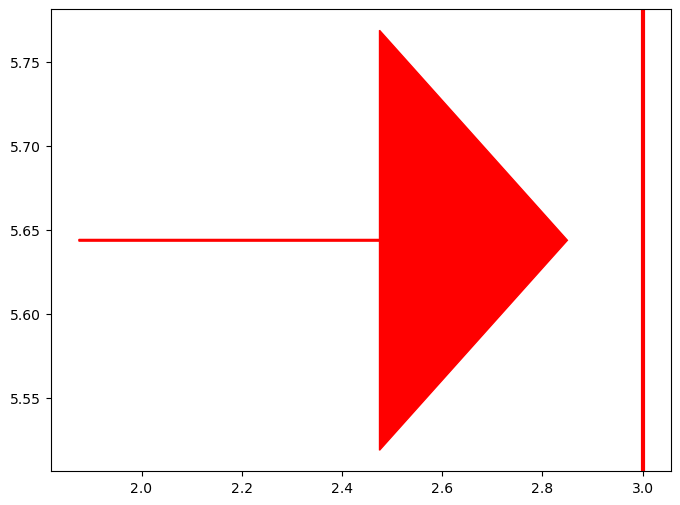

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
    
ax.axvline(x.max(), c='r', lw=3)
ax.arrow(x.max()/1.6, y.max()/2, x.max()/5, 0, color='r', head_width=.25)

In [50]:
# Helper function to plot the data
def plot_it(cur_x, title='', ax=plt):
    y = f(x)
    ax.plot(x,y)
    ax.scatter(cur_x, f(cur_x), c='r', s=80, alpha=1);
    x_tan, y_tan, der = get_tangent_line(cur_x)
    ax.plot(x_tan, y_tan, ls='--', c='r')
    # Indicate when if our location is outside the x range
    if cur_x > x.max():
        ax.axvline(x.max(), c='r', lw=3)
        ax.arrow(x.max()/1.6, y.max()/2, x.max()/5, 0, color='r', head_width=.25)
        # Axes.arrow(x, y, dx, dy, **kwargs)
        # x, y The x and y coordinates of the arrow base.
        # dx, dy: The length of the arrow along x and y direction.

    if cur_x < x.min():
        ax.axvline(x.min(), c='r', lw=3)
        ax.arrow(x.max()/2.5, y.max()/2, -x.max()/5, 0, color='r', head_width=.25)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-3.5, 3.5)
    ax.set_title(title)

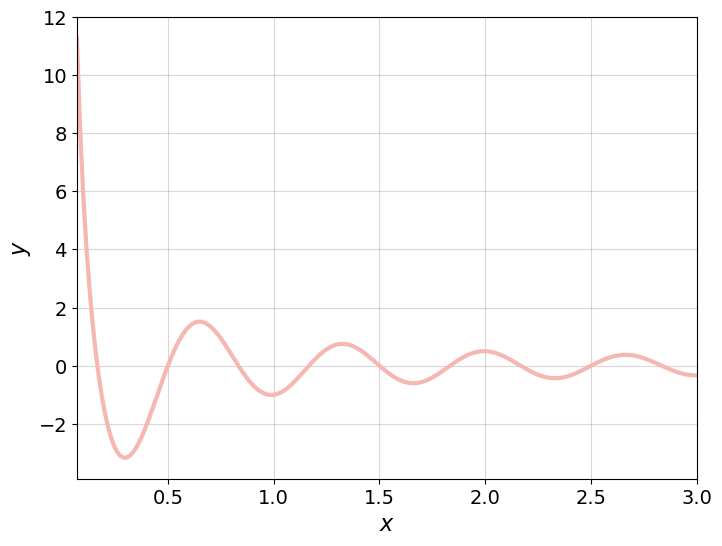

In [7]:
# Generate 200 predictor data points between 0.07 and 3 using np.linspace
x = np.linspace(0.07, 3, 200)

# Get the response data from the predictor data by calling the function f 
y = f(x)

# Helper code to plot the generated data
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x,y, linewidth=3, color='#F5B7B1')
plt.xlim(x.min(), x.max());
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.grid(alpha=0.5)
plt.show()

In [8]:
### edTest(test_clipping) ###

# Function to perform clipping
# This function should return the gradient with a magnitude<=clip_threshold
def clip(g, use_clip=0, clip_threshold=8):
    
    # Compare the absolute value of the gradient with the clip_threshold
    if np.abs(g)>clip_threshold and use_clip==1:
        
        # Compute the gradient based on the equation given
        g = g/np.abs(g) * clip_threshold
        
    return g

In [9]:
# Function to perform gradient descent with clipping and plot it
def gradient_descent(cur_x, learning_rate, epsilon, num_iter, clip_threshold, use_clip=0):
    
    # Plotting one panel per gradient descent iteration
    fig, axs = plt.subplots(num_iter//3, 3, figsize=(15,6), sharey=True)

    # To create sub-panels
    for i, ax in enumerate(axs.ravel()):
        plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)

        # Store the current x value before change in a separate variable
        prev_x = cur_x

        # Get the derivative of cur_x using the function der_f
        der_cur_x = der_f(cur_x)

        # Clip the gradient of the derivative of x by calling the 
        # clip function with use_clip and the clip_threshold as in 
        # the function definition 
        g = clip(der_cur_x, clip_threshold=clip_threshold, use_clip=use_clip)

        # Update the x-value using the learning rate
        cur_x = cur_x-learning_rate*g

        # Stop algorithm if magnitude of change goes below epsilon
        if np.abs(cur_x - prev_x) <= epsilon: 

            # Hide unused subplots on convergence
            for ax in axs.ravel()[i+1:]:
                ax.axis('off') 
            break

    plt.tight_layout()

    if i == len(axs.ravel())-1:
        print('Did not converge!')

### ⏸ Set the intial x value to 0.07, learning rate to 0.01, and epsilon to 0.025. With use_clip value as 0 perform gradient descent. What do you observe and why?

#### A. There is no convergence visible because of high learning rate.
#### B. There are 2 convergence points due to small decay rate.
#### C. The first gradient is very large and hence takes us away from the region of interest.
#### D. There is no convergence visible because the epsilon is extremely low.

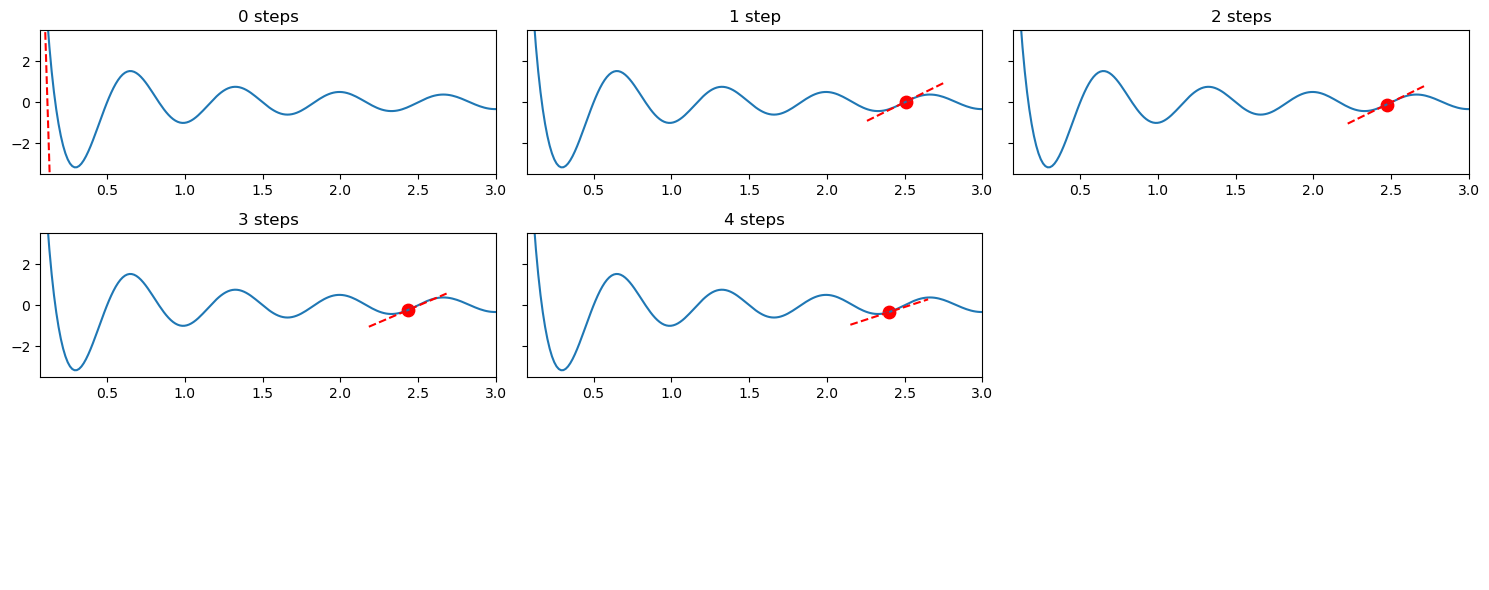

In [51]:
gradient_descent(cur_x=0.07, learning_rate=0.01, epsilon=0.025, use_clip=0, clip_threshold=8, num_iter=9)

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'C'

### ⏸ Now set the `use_clip` to 1 and set a reasonable threshold, what do you observe?

#### A. It still jumps away from the area of interest
#### B. Solution stays in the area of interest and converges
#### C. The solution doesn't not change
#### D. The solution doesn't jump away from the area of interest but it does not converge

Did not converge!


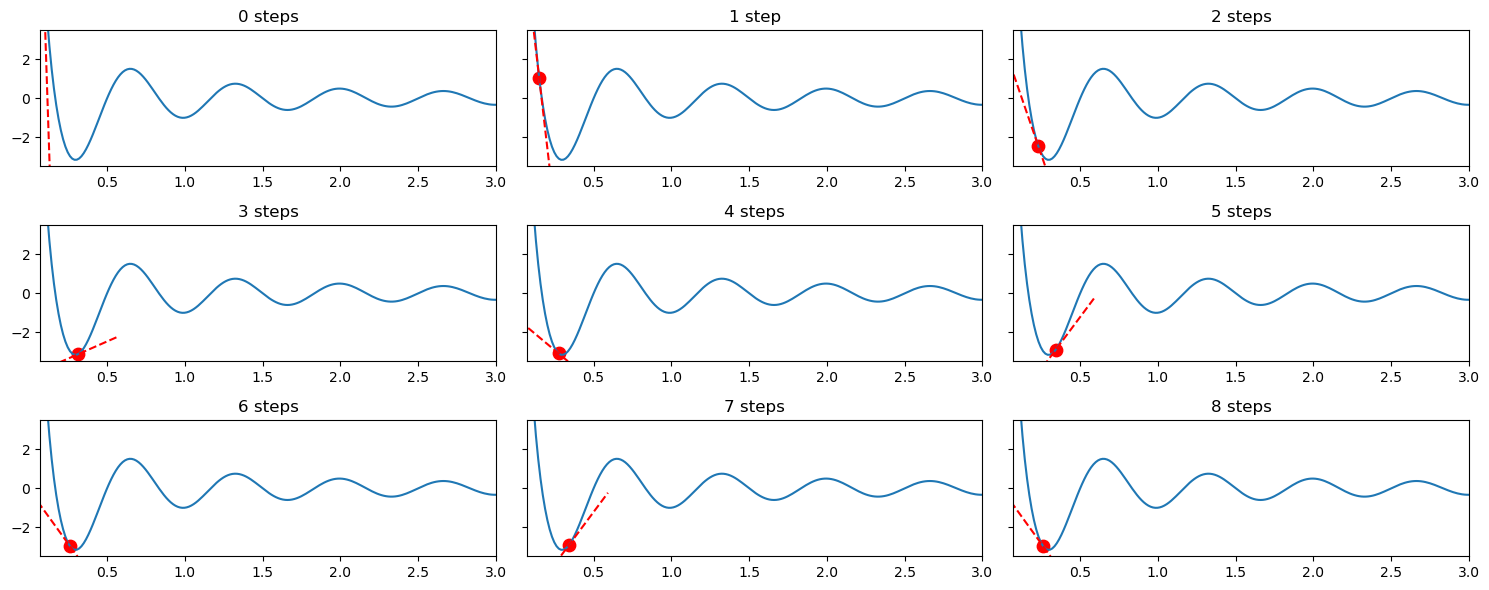

In [22]:
gradient_descent(cur_x=0.07, learning_rate=0.01, epsilon=0.025, use_clip=1, clip_threshold=8, num_iter=9)

In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'D'

### ⏸ What would you have to do to make the previous solution converge?

#### A. Increase the clipping threshold.
#### B. Reduce the learning rate.
#### C. Increase epsilon i.e. the convergence criteria.
#### D. B or C.

In [ ]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'D'

## Mindchow 🍲

After marking your exercise, try tweaking learning_rate, and perhaps the default value of clip_threshold. Can you anticipate how it will affect your results? 

See if you can find a combination that will converge to the global minimum.

In [1]:
### edTest(test_chow4) ###
# Type your answer within in the quotes given
answer4 = '___'